In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/maskpro/1.jpg
/kaggle/input/maskpro/2.jpg


In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.0/249.0 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144575 sha256=bba50e453de6aa3d5d166d8d8bce74bb8fe79da1c950f23b0f82352e5892b3ac
  Stored in directory: /root/.cache/pip/wheels/8b/8d/53/2af8772d9aec614e3fc65e53d4a993ad73c61daa8bbd85a873
Successfully built antlr4-python3-runtime


In [3]:
!yolo task=detect mode=predict model=yolov8n.pt source="https://ultralytics.com/images/bus.jpg"


100%|████████████████████████████████████████| 476k/476k [00:00<00:00, 17.7MB/s]
Ultralytics YOLOv8.0.5 🚀 Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
100%|██████████████████████████████████████| 6.24M/6.24M [00:00<00:00, 13.0MB/s]

Fusing layers... 
YOLOv8n summary: 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
image 1/1 /kaggle/working/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 11.5ms
Speed: 0.5ms pre-process, 11.5ms inference, 27.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


In [4]:
# Import required libraries
import pandas as pd
import numpy as np
import os
import random
import glob
from datetime import datetime
import xml.etree.ElementTree as ET 
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import yaml
import shutil
import warnings
warnings.filterwarnings('ignore')

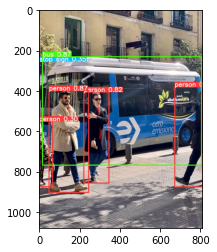

In [5]:
img= plt.imread('/kaggle/working/runs/detect/predict/bus.jpg')
plt.imshow(img)
plt.show()

In [6]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="qs3XhDwQ26bO8wkcWXuu")
project = rf.workspace("encoa").project("mask-detect-ugmdz")
dataset = project.version(1).download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 562.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 5.7 MB/s eta 0:00:00
  Created wheel for glob2: filename=glob2-0.7-py2.py3-none-any.whl size=9320 sha256=1ac4bf06b75440718177381ce21bb0983fb56332f86681bef67b33ea2869ca03
  Stored in directory: /root/.cache/pip/wheels/d7/3c/72/5300602ba1269ffce8cff5dcf7b525fee756b57455903c37ba
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=6264600662c41d12df111913bdc782ba972c0bcf4dc5f245e0f0a56a46a40b0d
  Stored in directory: /root

Extracting Dataset Version Zip to mask-detect-1 in yolov8:: 100%|██████████| 1708/1708 [00:00<00:00, 3546.76it/s]


In [7]:
!curl -L "https://app.roboflow.com/ds/CWlHwPi8q0?key=igaEdM6DqI" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   894  100   894    0     0   2621      0 --:--:-- --:--:-- --:--:--  2621
100 38.6M  100 38.6M    0     0  56.2M      0 --:--:-- --:--:-- --:--:-- 56.2M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/maksssksksss103_png.rf.8e792989b8220d4475fa15c168c6330b.jpg  
 extracting: test/images/maksssksksss119_png.rf.644bb31c5a044d59d981b3e9295b8a4c.jpg  
 extracting: test/images/maksssksksss122_png.rf.1b030b31c5cc79581fc3230a3a089382.jpg  
 extracting: test/images/maksssksksss128_png.rf.e3bcffa85c7cd1e849651f04b110c8ea.jpg  
 extracting: test/images/maksssksksss12_png.rf.f4e176391caabcd3b4b6065f3c6fe50e.jpg  
 extracting: test/images/maksssksksss136_png.rf.788e9f538095dcec32c2

In [8]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n.yaml")  # build a new model from scratch
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

# Use the model
results = model.train(data="data.yaml", epochs=50)  # train the model
results = model.val()  # evaluate model performance on the validation set
results = model("https://newsimg.hankookilbo.com/cms/articlerelease/2020/05/06/202005061378388912_1.jpg")  # predict on an image
success = YOLO("yolov8n.pt").export(format="onnx")  # export a model to ONNX format


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.Conv                  [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.Conv                  [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.C2f                   [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.C2f                   [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.C2f                   [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.Conv                  [128

  0%|          | 0.00/755k [00:00<?, ?B/s]

Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.Conv                  [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.Conv                  [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.C2f                   [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.C2f                   [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.C2f                   [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

  0%|          | 0.00/180k [00:00<?, ?B/s]

Ultralytics YOLOv8.0.5 🚀 Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Fusing layers... 
Model summary: 168 layers, 3006233 parameters, 0 gradients
image 1/1 /kaggle/working/202005061378388912_1.jpg: 384x640 30 with_masks, 5 without_masks, 21.1ms
Speed: 0.4ms pre-process, 21.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.5 🚀 Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Fusing layers... 
YOLOv8n summary: 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

PyTorch: starting from yolov8n.pt with output shape (1, 84, 8400) (6.2 MB)

ONNX: starting export with onnx 1.13.0...
ONNX: export failure ❌ 0.1s: Unsupported ONNX opset version: 17


In [9]:
results = model("/kaggle/input/maskpro/1.jpg")  # predict on an image
success = YOLO("yolov8n.pt").export(format="onnx")  # export a model to ONNX format

Ultralytics YOLOv8.0.5 🚀 Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Fusing layers... 
Model summary: 168 layers, 3006233 parameters, 0 gradients
image 1/1 /kaggle/input/maskpro/1.jpg: 352x640 5 with_masks, 3 without_masks, 10.2ms
Speed: 0.4ms pre-process, 10.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.5 🚀 Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Fusing layers... 
YOLOv8n summary: 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

PyTorch: starting from yolov8n.pt with output shape (1, 84, 8400) (6.2 MB)

ONNX: starting export with onnx 1.13.0...
ONNX: export failure ❌ 0.0s: Unsupported ONNX opset version: 17


In [10]:
!pip install torch

In [11]:
runs/detect/train/weights/best.pt source="/kaggle/input/maskpro/1.jpg"

SyntaxError: invalid syntax (2759266734.py, line 1)

In [ ]:
img= plt.imread('/kaggle/working/runs/detect/predict/1.jpg')
plt.imshow(img)
plt.show()

In [ ]:
!yolo task=detect mode=predict line_thickness=1 model=runs/detect/train/weights/best.pt source="/kaggle/input/maskpro/"

In [ ]:
img= plt.imread('runs/detect/predict2/2.jpg')
plt.figure(figsize=(15, 10))
plt.imshow(img)
plt.grid(False)
plt.show()

In [ ]:
img= plt.imread('runs/detect/predict2/1.jpg')
plt.figure(figsize=(15, 10))
plt.imshow(img)
plt.grid(False)
plt.show()

In [ ]:
!yolo task=detect mode=predict line_thickness=1 model=runs/detect/train/weights/best.pt source="/kaggle/input/maskpro/"

In [ ]:
plt.figure(figsize=(10, 6))

img= plt.imread('runs/detect/predict6/1.jpg')
plt.imshow(img)
plt.show()

In [ ]:
!yolo task=detect mode=predict line_thickness=2 model=runs/detect/train/weights/best.pt source="/kaggle/input/maskpro/"

In [ ]:
from IPython.display import FileLink

FileLink(r'runs/detect/train/weights/best.pt')

In [ ]:
!ls -la 